In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
from matplotlib.ticker import FuncFormatter
from holoviews.plotting.bokeh.styles import marker
from pandas.core.interchange.dataframe_protocol import DataFrame

In [3]:
def VisProduction(production):
    num_columns_to_plot = production.shape[1] - 1  # Exclude 'actProd' from the count
    fig, axes = plt.subplots(num_columns_to_plot, 1, figsize=(10, 5 * num_columns_to_plot))

    # Loop through each column after 'actProd'
    for j in range(1, production.shape[1]):  # Start from index 1 to skip 'actProd'
        label = str(production.columns[j])  # Get the column label
        color = (np.random.rand(), np.random.rand(), np.random.rand())
        axes[j-1].plot(production.index, production.iloc[:, j], label=label, marker='o', color=color)  # Plot forecast
        axes[j-1].plot(production.index, production['actProd'], label="Actual Production", marker='o', color='orange')  # Plot actual production
        axes[j-1].set_title(f'{label} vs Actual Production')  # Set title for the subplot
        axes[j-1].set_xlabel('Time')  # Set x-axis label
        axes[j-1].set_ylabel('Power Production')  # Set y-axis label
        axes[j-1].grid()  # Add a grid
        axes[j-1].legend()
    
    plt.title('Production vs. Prediction')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.legend()  # Show the legend
    plt.grid() 
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [4]:
def VisPrices(prices):
    
    fig = plt.figure(figsize=(10, 5))
    for j in range(0, prices.shape[1]):
        label = str(prices.columns[j])  # Get the column label
        color = (np.random.rand(), np.random.rand(), np.random.rand())
        plt.plot(prices.index, prices.iloc[:, j], label=label, marker='o', color=color)
    
    plt.title('Price development')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()  
    plt.grid() 
    plt.show()

In [243]:
def VisRevenue(solutions):
    df_weekly = solutions.resample('W').sum()
    df_Monthly = solutions.resample('ME').sum()

    def thousand_separator(x, pos):
        return f'{int(x):,} €'.replace(",", ".")
    
    df_overall = solutions.sum()
    print(df_overall)
    fig, axes = plt.subplots(2, 1, figsize=(20, 12))
    
    #weekly Revenue as Line-Diagramm
    axes[0].plot(df_weekly.index, df_weekly["LinRegRev"], label="Linear Regression", color="red", marker="")
    axes[0].plot(df_weekly.index, df_weekly["NonLinReg1Rev"], label="Non Linear Regression 1",  color="blue", marker="")
    axes[0].plot(df_weekly.index, df_weekly["NonLinReg2Rev"], label="Non Linear Regression 2",color="green", marker="")
    axes[0].set_title('Weekly revenue for each Model', fontsize=18)
    axes[0].grid() 
    axes[0].set_ylabel('Revenue', fontsize=14)
    axes[0].legend(fontsize=12)
    axes[0].yaxis.set_major_formatter(FuncFormatter(thousand_separator))
    
    axes[0].tick_params(axis='x', labelsize=16)  # X-axis tick labels
    axes[0].tick_params(axis='y', labelsize=16)

    bar_width = 6  # passt die Breite der Balken an
    bar_offset = pd.DateOffset(days=5)
    
    # Erstelle Balkendiagramme für jede Zeitreihe mit Offset
    axes[1].bar(df_Monthly.index - bar_offset, df_Monthly['LinRegRev'], width=bar_width, label='Linear Regression', color='red')
    axes[1].bar(df_Monthly.index, df_Monthly['NonLinReg1Rev'], width=bar_width, label='Non Linear Regression 1', color='blue')
    axes[1].bar(df_Monthly.index + bar_offset, df_Monthly['NonLinReg2Rev'], width=bar_width, label='Non Linear Regression 2', color='green')
    
    # Titel und Achsenbeschriftungen hinzufügen
    axes[1].set_title("Monthly revenue for each Model", fontsize=18)
    axes[1].set_ylabel('Revenue', fontsize=14)
    axes[1].set_xticks(df_Monthly.index)
    axes[1].set_xticklabels(df_Monthly.index.strftime('%B'), rotation=45, ha='right')
    axes[1].legend(fontsize=12)
    axes[1].yaxis.set_major_formatter(FuncFormatter(thousand_separator))
    axes[1].tick_params(axis='x', labelsize=16)  # X-axis tick labels
    axes[1].tick_params(axis='y', labelsize=16)
    
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.show()
    
    

                       LinRegRev  NonLinReg1Rev  NonLinReg2Rev
HourDK                                                        
2022-09-01 00:00:00  1471.253538    1526.279520    1692.936663
2022-09-01 01:00:00  1457.971429    1512.500472    1677.654092
2022-09-01 02:00:00  1457.973095    1512.502379    1677.655171
2022-09-01 03:00:00  1484.461231    1539.979826    1708.140855
2022-09-01 04:00:00  1597.221218    1656.955098    1837.900606
...                          ...            ...            ...
2022-12-31 19:00:00    31.246734      29.992744      46.136926
2022-12-31 20:00:00    22.412694      20.541402      33.908229
2022-12-31 21:00:00    29.006112      26.576617      44.040475
2022-12-31 22:00:00    26.399876      27.923005      36.753282
2022-12-31 23:00:00    11.914750      12.156756      16.844919

[2872 rows x 3 columns]
LinRegRev        1.569951e+06
NonLinReg1Rev    1.572190e+06
NonLinReg2Rev    2.044801e+06
dtype: float64
                LinRegRev  NonLinReg1Rev  NonLinReg

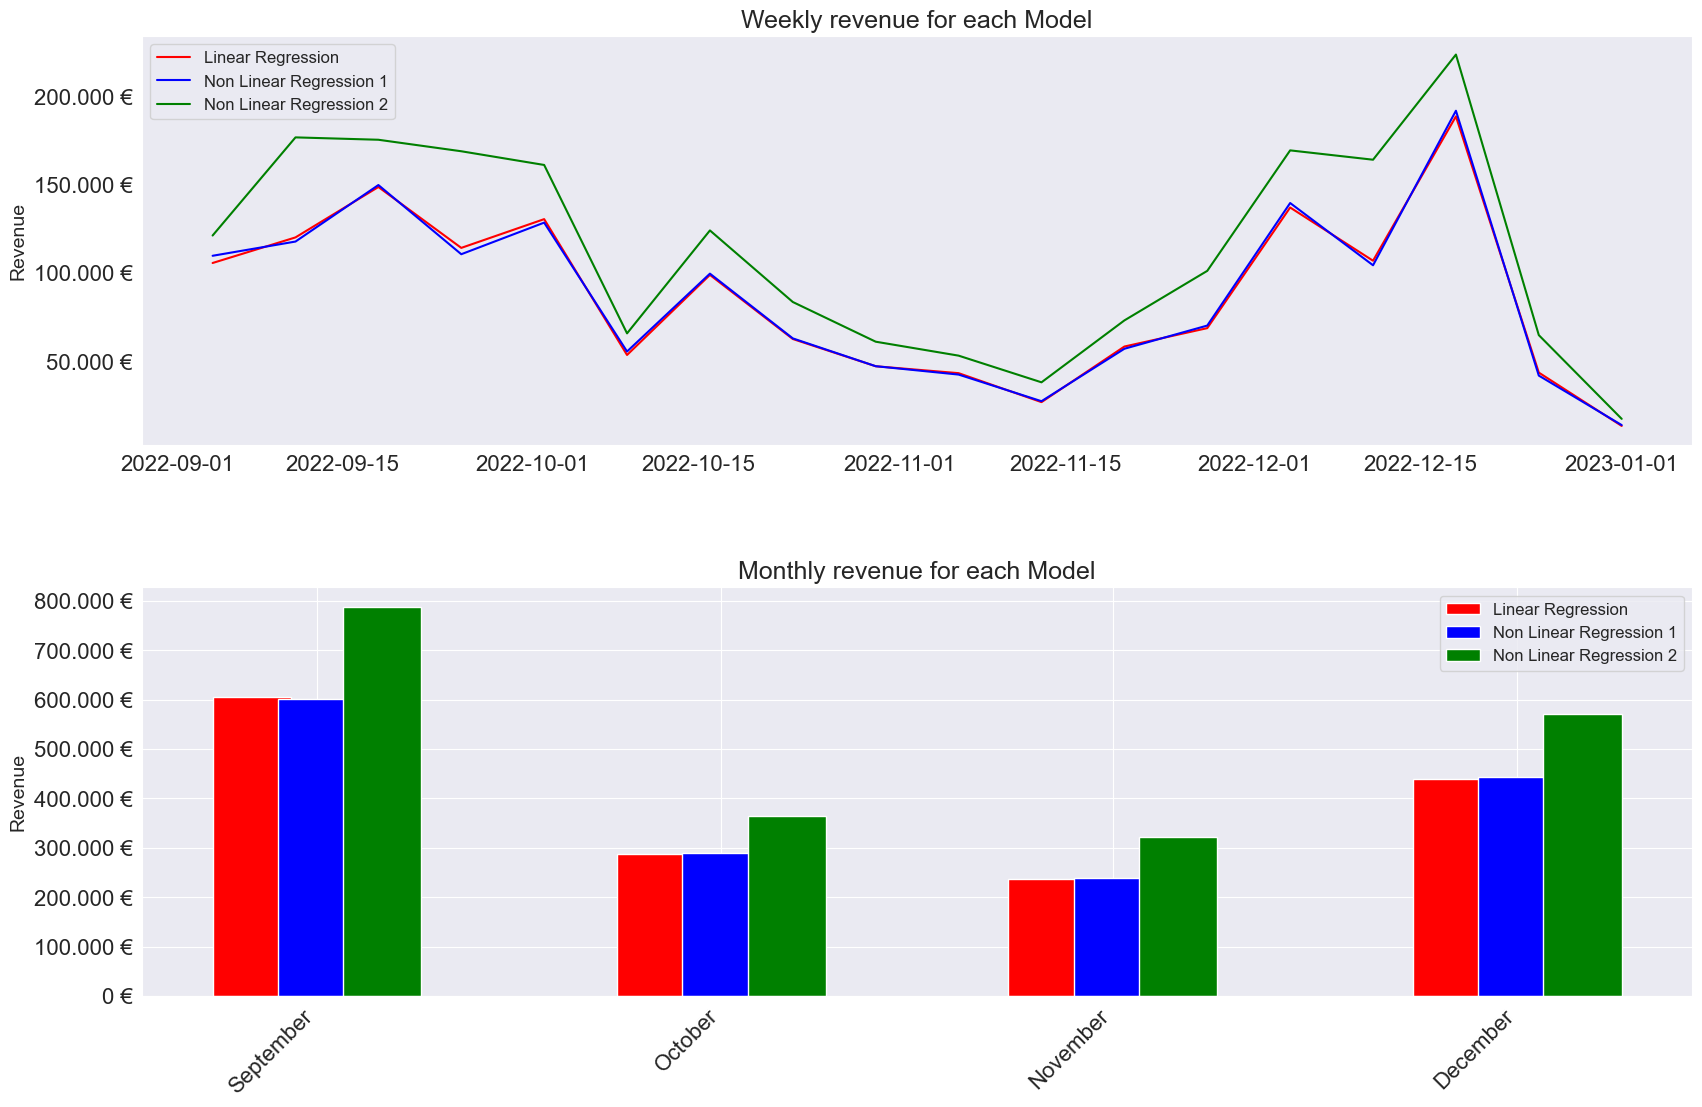

In [242]:
solutions = pd.read_csv('./Data assignment 1/Revenue_model1_final.csv')
solutions["HourDK"] = pd.to_datetime(solutions["HourDK"])
solutions.set_index('HourDK', inplace=True)
print(solutions)
VisRevenue(solutions)

In [6]:
def Visualise(solutions,data):
    
    prices = data.iloc[:,:4]
    production = data.iloc[:,4:]
    #ts=data.iloc[:,0]
    #production['HourDK'] = prices['HourDK']
    #production=pd.concat([ts,production],axis=1)

    #prices.set_index('HourDK', inplace=True)
    #production.set_index('HourDK', inplace=True)
    #solutions.set_index('HourDK', inplace=True)
    
    VisProduction(production)
    VisPrices(prices)
    
    VisRevenue(solutions)

In [2]:
# p_t_hat as decision variable
def OptimizationProblemEnergybid(data):
    model = gp.Model()
    solutions  = list()
    capacity = 6000.0
    
    for index, row in data.iterrows():
        
        if pd.isnull(row[['p_t', 'DA_PriceEUR', 'BalancingPriceDownEUR', 'BalancingPriceUpEUR']]).any():
            continue
        
        p_t_hat = model.addVar(name="p_t_hat", lb=0, ub=capacity, vtype=GRB.INTEGER)
        z_down = model.addVar(name="z_down", vtype=GRB.CONTINUOUS, lb=0)
        z_up = model.addVar(name="z_up", vtype=GRB.CONTINUOUS, lb=0)
        
        condition_down = model.addVar(name="condition_down", vtype=GRB.BINARY)
        condition_up = model.addVar(name="condition_up", vtype=GRB.BINARY)
        
        model.addConstr(z_up <= (p_t_hat - row['p_t']) * condition_up)
        model.addConstr(z_up >= (p_t_hat - row['p_t']) * condition_up)
        model.addConstr(z_down <= (row['p_t'] - p_t_hat) * condition_down)
        model.addConstr(z_down >= (row['p_t'] - p_t_hat) * condition_down)
        model.addConstr(condition_up + condition_down == 1)
        
    
        #defining the constraints
        model.addConstr(-p_t_hat <= 0)
        model.addConstr(p_t_hat <= capacity)
        model.addConstr(-z_down <= 0)
        model.addConstr(-z_up <= 0)
        
        model.setObjective((row['DA_PriceEUR']*p_t_hat)+(row['BalancingPriceDownEUR']*z_down-row['BalancingPriceUpEUR']*z_up), GRB.MAXIMIZE)
        
        model.optimize()
    
        if model.status == GRB.OPTIMAL:
            print("Optimal solution found!")
            print(f"Objective Value: {model.ObjVal}")
            
            values = {"Day-Ahead-Price": row['DA_PriceEUR'],
                      "BalancingPriceUp":row['BalancingPriceUpEUR'],
                      "BalancingPriceDown":row['BalancingPriceDownEUR'],
                      "p_t":row['p_t'],
                      "Revenue":model.ObjVal
                      }
            values.update({v.varName: v.x for v in model.getVars()})
        
            
            solutions.append({row['HourDK']:values})
                
        elif model.status == GRB.INFEASIBLE:
            print("Model is infeasible.")
            model.computeIIS()
            model.write("infeasible.ilp")  # Write IIS to a file for review
            for c in model.getConstrs():
                if c.IISConstr:
                    print(f"Infeasible constraint: {c.constrName}")
            
            
        elif model.status == GRB.UNBOUNDED:
            print("Model is unbounded.")
        else:
            print("Model status:", model.status)
            
        model.remove(model.getConstrs())
        model.remove(model.getVars())
        
    solutions = pd.DataFrame([v for d in solutions for v in d.values()],
                  index=[ts for d in solutions for ts in d.keys()])    
    
    return solutions

In [3]:
#Helping Method to limit the  
def ObservationPeriod(Start_Observation, End_Observation, data):
    Start_Observation = pd.to_datetime(Start_Observation)
    End_Observation = pd.to_datetime(End_Observation)
    condition = (data["HourDK"]>= Start_Observation) & (data["HourDK"]< End_Observation)
    data  = data[condition]
    return data
        

## Revenue Calculation

### Data Preperation

In [4]:
prices_df = pd.read_csv('./Data assignment 1/prices_merged_df_output.csv', delimiter=',')
features_df = pd.read_csv('./Data assignment 1/Feature data.csv', delimiter=',')
production_df = pd.read_csv('Data assignment 1/Final_power.csv', delimiter=',')

prices_df = pd.merge(prices_df, features_df, how='outer', left_on='HourDK', right_on='datetime')
prices_df = pd.concat([prices_df, production_df[['Linear Regression', 'Non-Linear Regression 1', 'Non-Linear Regression 2']]], axis=1)


prices_df['AKI Kalby Active Power'] = (-1 * prices_df['AKI Kalby Active Power'])
data = prices_df.copy()
data.rename(columns={'AKI Kalby Active Power': 'actProd'}, inplace=True)
data["HourDK"] = pd.to_datetime(data["HourDK"])

data = ObservationPeriod("2022-09-01 00:00:00", "2022-09-02 00:00:00", data)

data.reset_index(drop=True, inplace=True)
prices_df.reset_index(drop=True, inplace=True)

### Linear Regression

In [5]:
data.rename(columns={'Linear Regression': 'p_t'}, inplace=True)
LinRegRev = OptimizationProblemEnergybid(data)
data.rename(columns={'p_t': 'Linear Regression'}, inplace=True)

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 22.6.0 22G830)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 5 columns and 6 nonzeros
Model fingerprint: 0x4ec44644
Model has 4 quadratic constraints
Variable types: 2 continuous, 3 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+02]
  Objective range  [5e-01, 6e-01]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 6e+03]
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolved: 4 rows, 7 columns, 11 nonzeros
Presolved model has 2 SOS constraint(s)
Variable types: 2 continuous, 5 integer (2 binary)
Found heuristic solution: objective 62.2889250

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explor

### Non - Linear Regression 1

In [6]:
data.rename(columns={'Non-Linear Regression 1': 'p_t'}, inplace=True)
NonLinReg1Rev = OptimizationProblemEnergybid(data)
data.rename(columns={'p_t': 'Non-Linear Regression 1'}, inplace=True)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 22.6.0 22G830)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 5 columns and 6 nonzeros
Model fingerprint: 0x4e39c01a
Model has 4 quadratic constraints
Variable types: 2 continuous, 3 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+02]
  Objective range  [5e-01, 6e-01]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 6e+03]
Presolve removed 5 rows and 5 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: -62.5314 
No other solutions better than -62.5314

Optimal solution found (tolerance 1.00e-04)
Best objective -6.253137588501e+01, best bound -6.253

### Non - Linear Regression 2

In [7]:
data.rename(columns={'Non-Linear Regression 2': 'p_t'}, inplace=True)
NonLinReg2Rev = OptimizationProblemEnergybid(data)
data.rename(columns={'p_t': 'Non-Linear Regression 2'}, inplace=True)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 22.6.0 22G830)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 5 columns and 6 nonzeros
Model fingerprint: 0x493e3eaf
Model has 4 quadratic constraints
Variable types: 2 continuous, 3 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 6e+02]
  Objective range  [5e-01, 6e-01]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 6e+03]
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolved: 4 rows, 7 columns, 11 nonzeros
Presolved model has 2 SOS constraint(s)
Variable types: 2 continuous, 5 integer (2 binary)
Found heuristic solution: objective 314.6478433

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
T

In [8]:
df_Rev = pd.DataFrame({
    'LinRegRev': LinRegRev['Revenue'],
    'NonLinReg1Rev': NonLinReg1Rev['Revenue'],
    'NonLinReg2Rev': NonLinReg2Rev['Revenue']
})

print(df_Rev.sum())

LinRegRev        -2057.803392
NonLinReg1Rev    -5309.896270
NonLinReg2Rev    11340.848346
dtype: float64


## P_t_Hat computation for Model 2

In [241]:
# Computing the optimal biding strategy values based on the historic data
# Hourly Optimization Problem
data.rename(columns={'actProd': 'p_t'}, inplace=True)
#solutions = OptimizationProblemEnergybid(data)

#df_target = pd.DataFrame({
#    'p_t_hat': solutions['p_t_hat']
#})
data.rename(columns={'p_t': 'actProd'}, inplace=True)


data = data[['HourDK', 'BalancingPriceUpEUR', 'BalancingPriceDownEUR', 'DA_PriceEUR', 'actProd']]
print(data)

#df_target.to_csv("./Data assignment 1/TargetValues_Model2.csv", index=True)
#data.to_csv("./Data assignment 1/Features_Model2.csv", index=True)
#     

                HourDK  BalancingPriceUpEUR  BalancingPriceDownEUR  \
0  2022-12-20 00:00:00              0.10819                0.10819   
1  2022-12-20 01:00:00              0.09241                0.07817   
2  2022-12-20 02:00:00              0.09245                0.07704   
3  2022-12-20 03:00:00              0.07635                0.03700   
4  2022-12-20 04:00:00              0.08194                0.03155   
5  2022-12-20 05:00:00              0.09921                0.03226   
6  2022-12-20 06:00:00              0.14999                0.10000   
7  2022-12-20 07:00:00              0.19968                0.16000   
8  2022-12-20 08:00:00              0.22340                0.22340   
9  2022-12-20 09:00:00              0.22514                0.22514   
10 2022-12-20 10:00:00              0.22037                0.19100   
11 2022-12-20 11:00:00              0.22734                0.19100   
12 2022-12-20 12:00:00              0.21923                0.19100   
13 2022-12-20 13:00: